Saving фото.jpg to фото (15).jpg


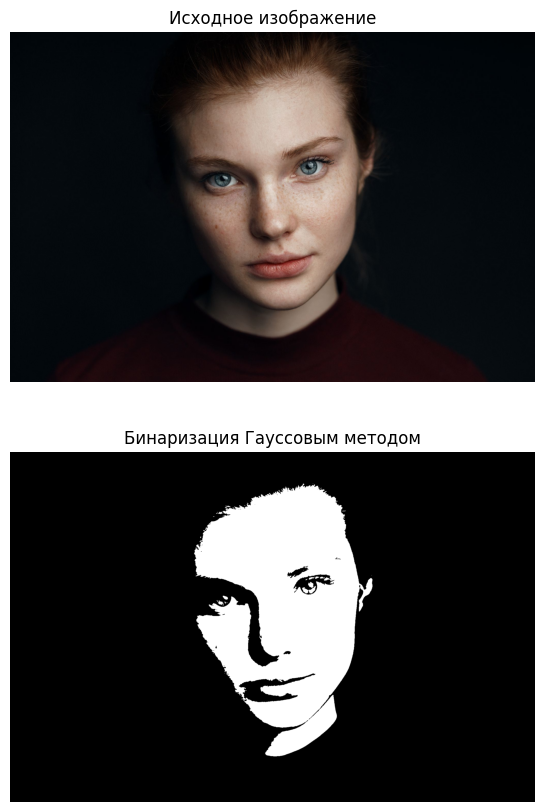

In [27]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Загрузка изображения с компьютера
uploaded = files.upload()
image_path = next(iter(uploaded))

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Функция отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, len(images)//2, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


# Гауссово бинарное преобразование
# Первый шаг - размытие изображения, чтобы уменьшить шум, используется матрица свертки 5x5.
blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)
binary_gaussian = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Выводим результаты
titles = ['Исходное изображение', 'Бинаризация Гауссовым методом']
images = [image_rgb , binary_gaussian]

show_images(titles, images)


Saving фото.jpg to фото (11).jpg


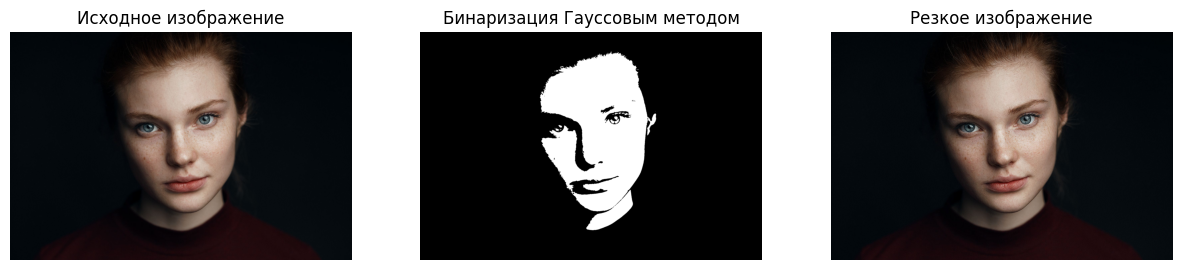

In [23]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Загрузка изображения с компьютера
uploaded = files.upload()
image_path = next(iter(uploaded))

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Функция отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 10))
    cols = len(images) if len(images) <=3  else 2 # если кол-во изображений 3 и меньше, то все в одну строку, иначе - 2 столбца
    for i in range(len(images)):
        plt.subplot((len(images) + 1)// cols, cols, i + 1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()
    # Гауссово бинарное преобразование
# Первый шаг - размытие изображения, чтобы уменьшить шум, используется матрица свертки 5x5.
blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)
binary_gaussian = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Повышение резкости
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(image_rgb, -1, kernel)


# Выводим результаты
titles = ['Исходное изображение', 'Бинаризация Гауссовым методом', 'Резкое изображение']
images = [image_rgb , binary_gaussian , sharpened]

show_images(titles, images)



Saving фото.jpg to фото (9).jpg


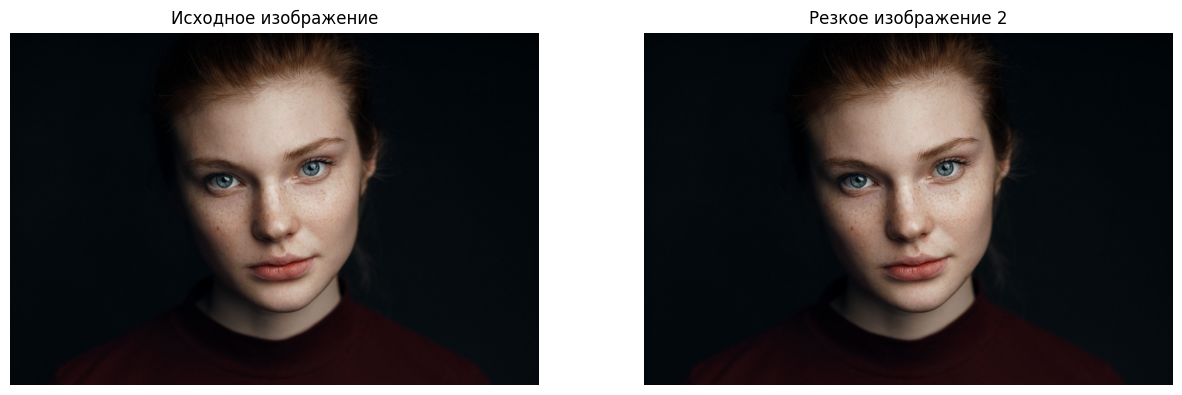

In [21]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Загрузка изображения с компьютера
uploaded = files.upload()
image_path = next(iter(uploaded))

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Функция отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 10))
    cols = len(images) if len(images) <= 3 else 2  # если кол-во изображений 3 и меньше, то все в одну строку, иначе - 2 столбца
    for i in range(len(images)):
        plt.subplot((len(images) + 1) // cols, cols, i + 1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# 1. Размытие изображения
blurred = cv2.GaussianBlur(image_rgb, (5, 5), 0)


# 2. Повышение резкости 1
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(image_rgb, -1, kernel)


# 3. Повышение резкости 2
sharpened_2 = cv2.addWeighted(image_rgb, 1.5, blurred, -0.5, 0)

# Выводим результаты
titles = ['Исходное изображение', 'Резкое изображение 2']
images = [image_rgb, sharpened_2]

show_images(titles, images)



Saving фото.jpg to фото (17).jpg


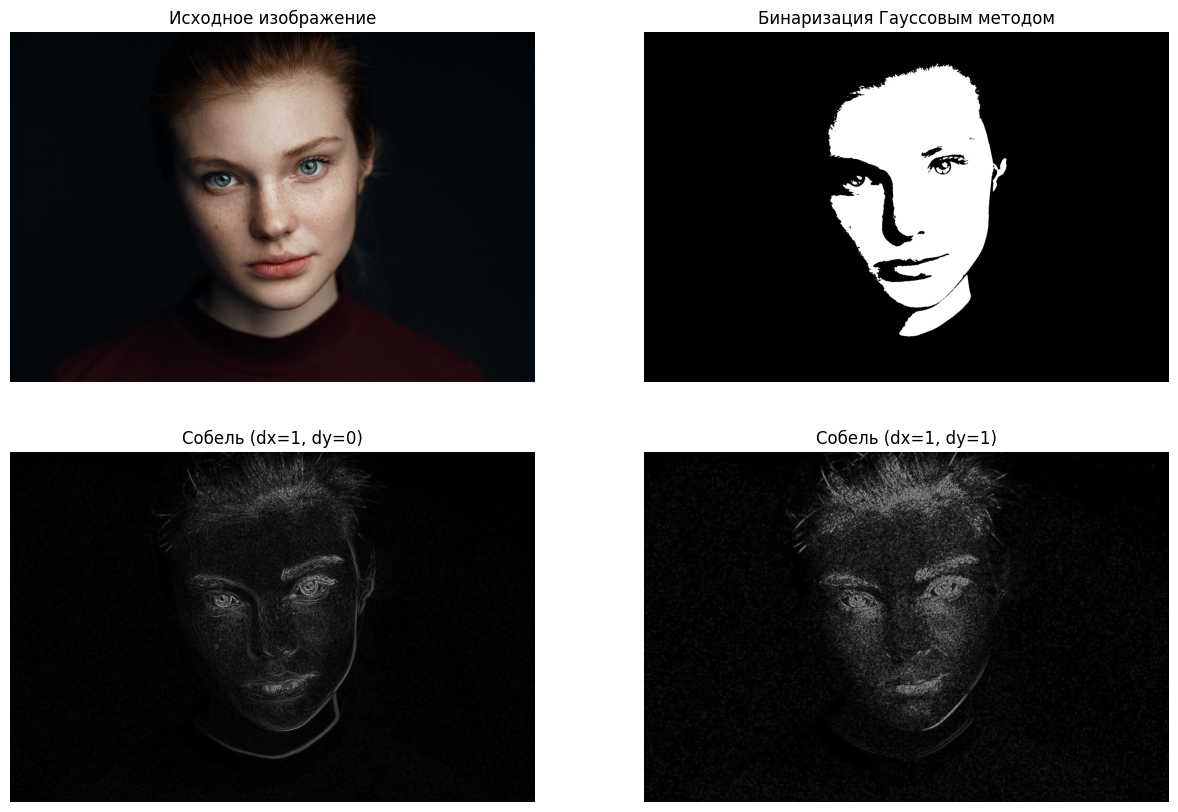

In [29]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Загрузка изображения с компьютера
uploaded = files.upload()
image_path = next(iter(uploaded))

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Функция отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 10))
    cols = len(images) if len(images) <= 3 else 2
    for i in range(len(images)):
        plt.subplot((len(images) + 1) // cols, cols, i + 1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# 1. Гауссово бинарное преобразование
# Первый шаг - размытие изображения, чтобы уменьшить шум, используется матрица свертки 5x5.
blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)
binary_gaussian = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# 2. Оператор Собеля (dx=1, dy=0)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobelx**2 + sobely**2)
sobel_combined = np.uint8(sobel_combined)

# 3. Оператор Собеля (dx=1, dy=1, ksize=5)
edges = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
edges = np.uint8(np.absolute(edges)) # Абсолютное значение и конвертация в uint8


sharpened = cv2.filter2D(image_rgb, -1, kernel)
# Выводим результаты
titles = ['Исходное изображение', 'Бинаризация Гауссовым методом', 'Собель (dx=1, dy=0)', 'Собель (dx=1, dy=1)']
images = [image_rgb, binary_gaussian, sobel_combined, edges]

show_images(titles, images)

Saving фото.jpg to фото (19).jpg


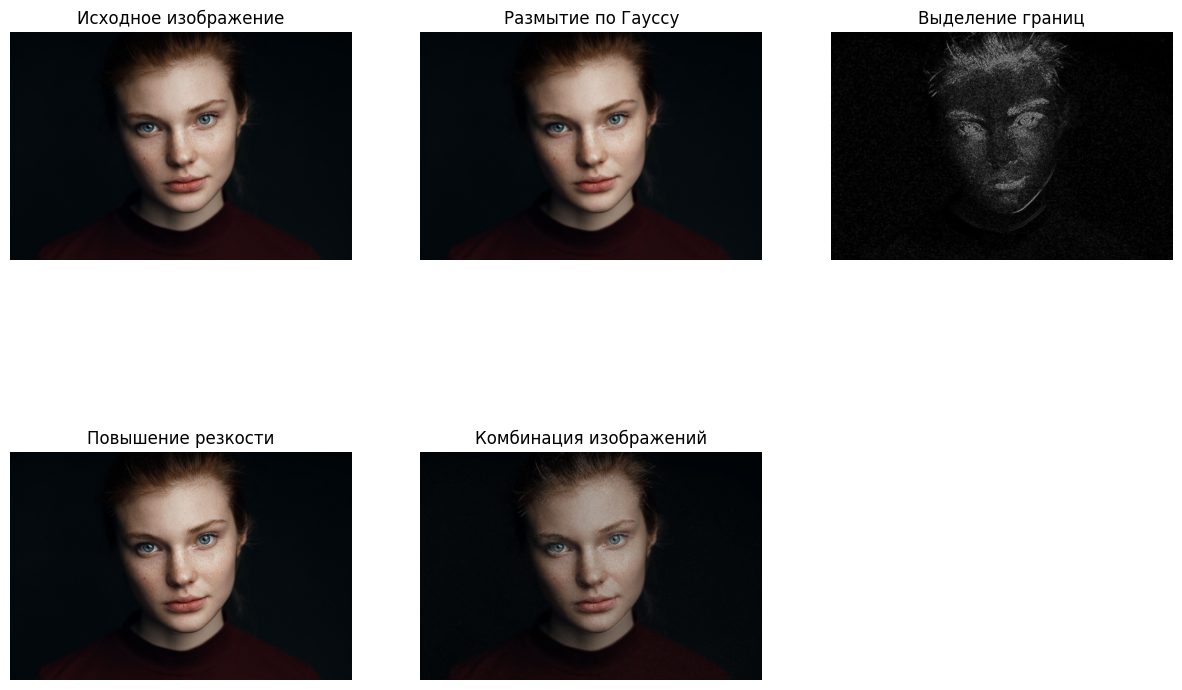

In [31]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Загрузка изображения с компьютера
uploaded = files.upload()
image_path = next(iter(uploaded))

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Функция отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 10))
    cols = len(images) if len(images) <= 3 else 3
    for i in range(len(images)):
        plt.subplot((len(images) + cols - 1) // cols , cols, i + 1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# 1. Гауссово бинарное преобразование
blurred = cv2.GaussianBlur(image_rgb, (5, 5), 0)
binary_gaussian = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# 2. Повышение резкости
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(image_rgb, -1, kernel)

# 3. Выделение границ
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobelx**2 + sobely**2)
sobel_combined = np.uint8(sobel_combined)
edges = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
edges = np.uint8(np.absolute(edges))

# Преобразование edges в RGB
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# 4. Комбинация изображений
combined = cv2.addWeighted(blurred, 0.5, edges, 0.5, 0)
combined = cv2.addWeighted(combined, 0.5, sharpened, 0.5, 0)


# Выводим результаты
titles = ['Исходное изображение', 'Размытие по Гауссу',  'Выделение границ', 'Повышение резкости', 'Комбинация изображений']
images = [image_rgb, blurred, edges, sharpened, combined]

show_images(titles, images)
